In [16]:
import os
import string
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image, ImageSequence
import datetime

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [17]:
os.listdir()

['Data',
 'Fig3.pdf',
 'Fig3.tif',
 'Figure3.ipynb',
 'Figure4.ipynb',
 'Figure5.ipynb',
 'Figure_S5.ipynb',
 'Figure_S7.ipynb']

In [18]:
age_tags = ['0-19', '20-34', '35-49', '50-64', '65+']
var_tags = ['Pre-Delta (TP)','Delta (TD)','Omicron (TO)']
# SDs = ['SD1', 'SD2', 'SD3', 'SD4']

In [19]:
df_beta = pd.read_excel('Data/beta_day.xlsx', sheet_name=0)
df_Rt = pd.read_excel('Data/Rt_day.xlsx', sheet_name=0)
df_f = pd.read_excel('Data/f_day.xlsx',sheet_name=0)

# mean_beta = pd.read_excel('beta_variants.xlsx', sheet_name=0,index_col=0)
# mean_Rt = pd.read_excel('Rt_variants.xlsx', sheet_name=0,index_col=0)
# mean_f = pd.read_excel('f_variants.xlsx',sheet_name=0,index_col=0)

In [20]:
df_beta=df_beta.dropna()
df_Rt=df_Rt.dropna()
df_f=df_f.dropna()

In [21]:
df_beta

,날짜,time,0-19,20-34,35-49,50-64,65+,0-19.1,20-34.1,34-49,50-64.1,65+.1,0-19.2,20-34.2,34-49.1,50-64.2,65+.2
0,2021-02-26,0,0.009280,0.016010,0.017854,0.030053,0.051183,0.008671,0.015359,0.017225,0.029033,0.047919,0.009888,0.016660,0.018482,0.031073,0.054448
1,2021-02-27,1,0.009280,0.016010,0.017854,0.030053,0.051183,0.008671,0.015359,0.017225,0.029033,0.047919,0.009888,0.016660,0.018482,0.031073,0.054448
2,2021-02-28,2,0.009280,0.016010,0.017854,0.030053,0.051183,0.008671,0.015359,0.017225,0.029033,0.047919,0.009888,0.016660,0.018482,0.031073,0.054448
3,2021-03-01,3,0.009280,0.016010,0.017854,0.030053,0.051183,0.008671,0.015359,0.017225,0.029033,0.047919,0.009888,0.016660,0.018482,0.031073,0.054448
4,2021-03-02,4,0.009280,0.016010,0.017854,0.030053,0.051183,0.008671,0.015359,0.017225,0.029033,0.047919,0.009888,0.016660,0.018482,0.031073,0.054448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,2022-11-26,638,0.032534,0.101942,0.083355,0.139264,0.324529,0.031001,0.096275,0.079075,0.130814,0.300095,0.034067,0.107609,0.087636,0.147714,0.348962
639,2022-11-27,639,0.032534,0.101942,0.083355,0.139264,0.324529,0.031001,0.096275,0.079075,0.130814,0.300095,0.034067,0.107609,0.087636,0.147714,0.348962
640,2022-11-28,640,0.032534,0.101942,0.083355,0.139264,0.324529,0.031001,0.096275,0.079075,0.130814,0.300095,0.034067,0.107609,0.087636,0.147714,0.348962
641,2022-11-29,641,0.032534,0.101942,0.083355,0.139264,0.324529,0.031001,0.096275,0.079075,0.130814,0.300095,0.034067,0.107609,0.087636,0.147714,0.348962


In [22]:
index=np.arange(5)
index2=np.arange(1)

In [23]:
col=var_tags

In [24]:
# 2021-07-01 : 125
# 2022-12-01 : 309

tmp=df_beta
s_beta=[]
s_beta.append(tmp[tmp.index<125].describe()[age_tags])
s_beta.append(tmp[(tmp.index<309) & (tmp.index>=125)].describe()[age_tags])
s_beta.append(tmp[tmp.index>=309].describe()[age_tags])

tmp=df_f
s_f=[]
s_f.append(tmp[tmp.index<125].describe()[age_tags])
s_f.append(tmp[(tmp.index<309) & (tmp.index>=125)].describe()[age_tags])
s_f.append(tmp[tmp.index>=309].describe()[age_tags])

# tmp=df_Rt
# s_Rt=[]
# s_Rt.append(tmp[tmp.index<125].describe())
# s_Rt.append(tmp[(tmp.index<309) & (tmp.index>=125)].describe())
# s_Rt.append(tmp[tmp.index>=309].describe())

tmp=df_Rt
s_Rt=[]
s_Rt.append(tmp[tmp.index<125]['Rt'])
s_Rt.append(tmp[(tmp.index<309) & (tmp.index>=125)]['Rt'])
s_Rt.append(tmp[tmp.index>=309]['Rt'])

In [25]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

In [36]:
colors = ('blue','limegreen','red')
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.family'] = 'Times New Roman'

fsize = 20*1.2
alphsize = 30
bar_width=0.25
# titles=[r'$\it{beta}$',r'$\it{f}',r'$\it{R_t}$']

In [37]:
for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print("{}: {}".format(key, plt.rcParamsDefault[key]))

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'Comic Neue', 'Comic Sans MS', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.t

In [48]:
tmp=s_beta
tmp[0].T.to_excel('b5_pre.xlsx')
tmp[1].T.to_excel('b5_delta.xlsx')
tmp[2].T.to_excel('b5_omi.xlsx')

In [49]:
tmp=s_f
tmp[0].T.to_excel('f5_pre.xlsx')
tmp[1].T.to_excel('f5_delta.xlsx')
tmp[2].T.to_excel('f5_omi.xlsx')

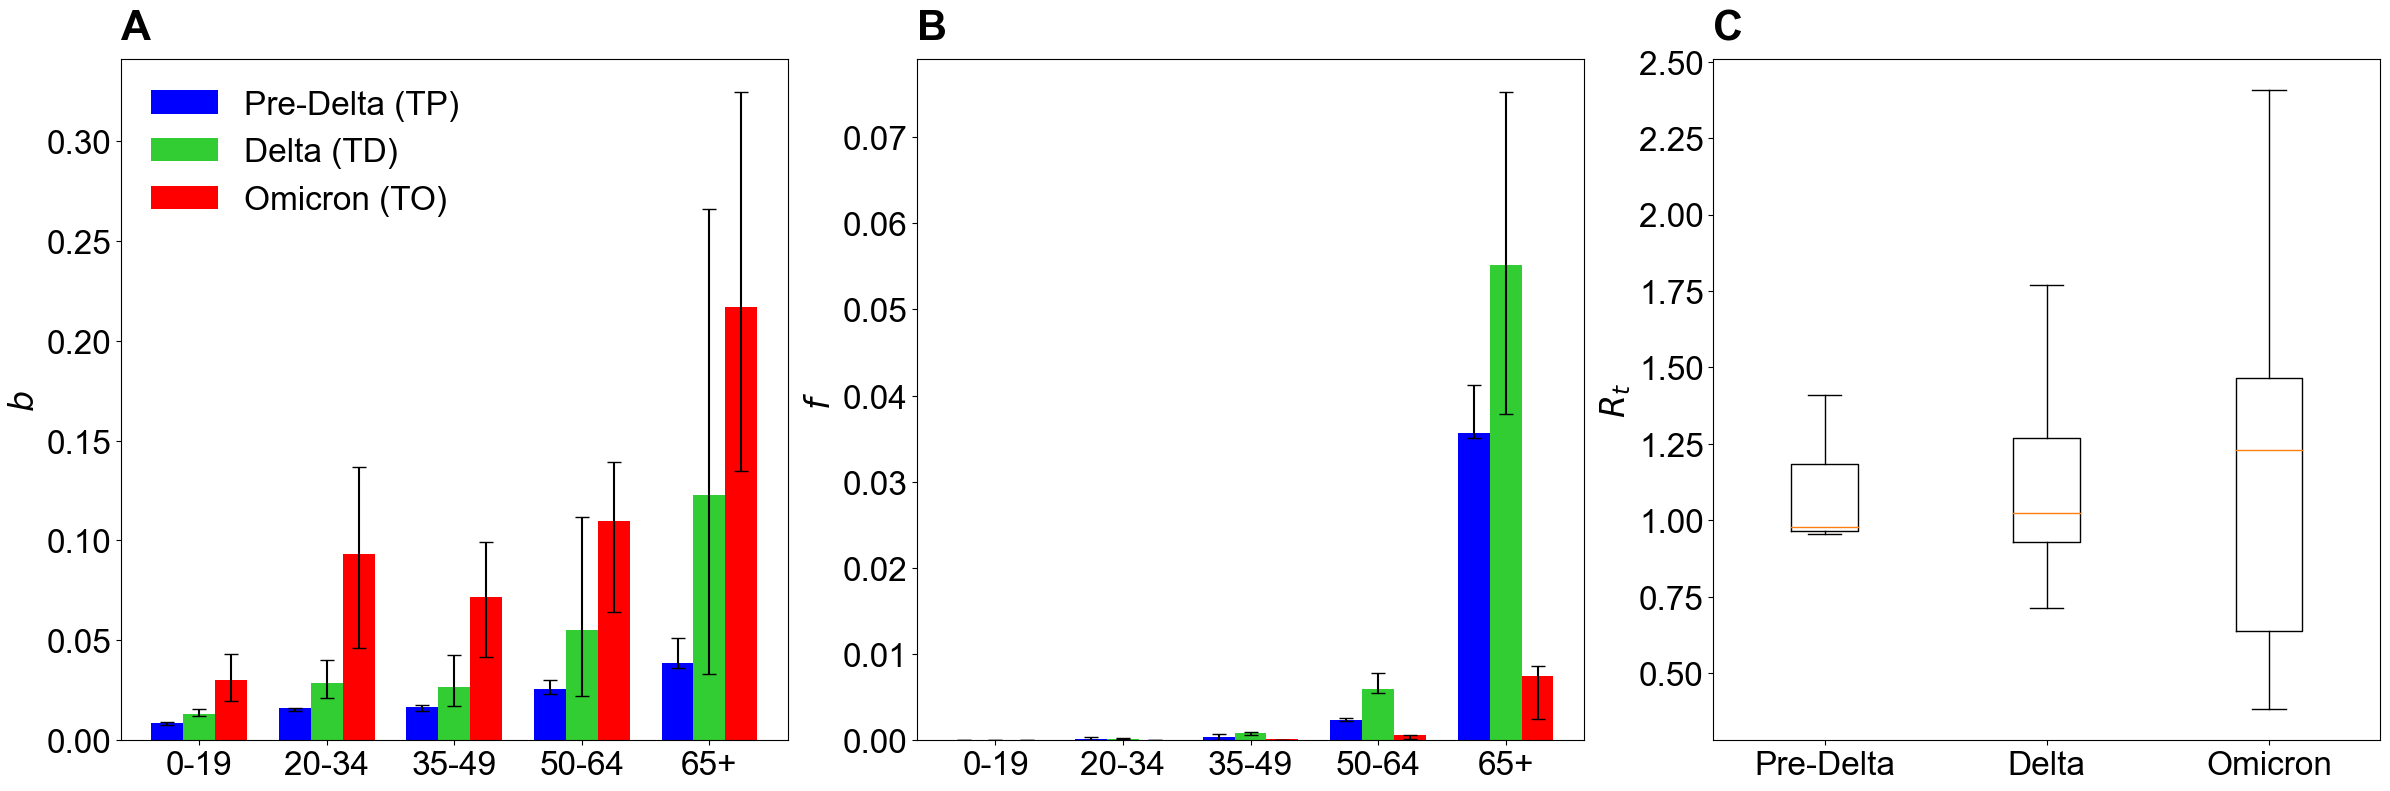

In [40]:

fig, ax = plt.subplots(figsize=(24, 8), nrows = 1, ncols = 3)

tmp=s_beta
start='25%'
end='75%'
ax[0].bar(index, tmp[0].T['mean'], bar_width, yerr=[tmp[0].T['mean']-tmp[0].T[start],tmp[0].T[end]-tmp[0].T['mean']],  color=colors[0], label=col[0],align='center', ecolor='black', capsize=5)
ax[0].bar(index+bar_width, tmp[1].T['mean'], bar_width, yerr=[tmp[1].T['mean']-tmp[1].T[start],tmp[1].T[end]-tmp[1].T['mean']], color=colors[1], label=col[1],align='center', ecolor='black', capsize=5)
ax[0].bar(index+2*bar_width, tmp[2].T['mean'], bar_width,yerr=[tmp[2].T['mean']-tmp[2].T[start],tmp[2].T[end]-tmp[2].T['mean']],  color=colors[2],label=col[2],align='center', ecolor='black', capsize=5)

ax[0].set_ylabel(r'$\it{b}$', fontsize = fsize)
ax[0].set_xticks(np.arange(bar_width, 5+bar_width,1))
ax[0].set_xticklabels(age_tags, fontsize = fsize)
ax[0].tick_params(axis = 'y', labelsize = fsize)
        
ax[0].text(0, 1.03, '{}'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, size=alphsize, weight='bold')


tmp=s_f
start='25%'
end='75%'
ax[1].bar(index, tmp[0].T['mean'], bar_width, yerr=[tmp[0].T['mean']-tmp[0].T[start],tmp[0].T[end]-tmp[0].T['mean']],  color=colors[0], label=col[0],align='center', ecolor='black', capsize=5)
ax[1].bar(index+bar_width, tmp[1].T['mean'], bar_width, yerr=[tmp[1].T['mean']-tmp[1].T[start],tmp[1].T[end]-tmp[1].T['mean']], color=colors[1], label=col[1],align='center', ecolor='black', capsize=5)
ax[1].bar(index+2*bar_width, tmp[2].T['mean'], bar_width,yerr=[tmp[2].T['mean']-tmp[2].T[start],tmp[2].T[end]-tmp[2].T['mean']],  color=colors[2],label=col[2],align='center', ecolor='black', capsize=5)

ax[1].set_ylabel(r'$\it{f}$', fontsize = fsize)
ax[1].set_xticks(np.arange(bar_width, 5+bar_width,1))
ax[1].set_xticklabels(age_tags, fontsize = fsize)
ax[1].tick_params(axis = 'y', labelsize = fsize)
        
ax[1].text(0, 1.03, '{}'.format(string.ascii_uppercase[1]), transform=ax[1].transAxes, size=alphsize, weight='bold')



tmp=s_Rt

# ax[2].boxplot([tmp[0],tmp[1],tmp[2]], patch_artist=True, boxprops=dict(colors,'k'))
ax[2].boxplot([tmp[0],tmp[1],tmp[2]],sym="")


ax[2].set_ylabel(r'$\it{R_t}$', fontsize = fsize)
ax[2].set_xticklabels(['Pre-Delta','Delta','Omicron'], fontsize = fsize)
ax[2].tick_params(axis = 'y', labelsize = fsize)
        
ax[2].text(0, 1.03, '{}'.format(string.ascii_uppercase[2]), transform=ax[2].transAxes, size=alphsize, weight='bold')

ax[0].legend(framealpha=0., fontsize=fsize, loc='upper left')


fig.align_xlabels(ax)
fig.align_ylabels(ax)
fig.tight_layout()

fig.savefig('Fig4.pdf', format='pdf', bbox_inches='tight', pad_inches=.1, dpi=300)
fig.savefig('Fig4.tif', format='tif', bbox_inches='tight', pad_inches=.1, dpi=300)

In [25]:
s_Rt[1].describe()

count    184.000000
mean       1.080174
std        0.294423
min        0.086731
25%        0.928567
50%        1.022620
75%        1.269177
max        1.768861
Name: Rt, dtype: float64